In [1]:
# importing Data set

import h5py
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras import layers
from keras.layers import Dense
from keras import models

# Images

in this notebook, we will deal with images dataset (unstructured data)

to import Dataset of images that stored in ('filename.h') file
                    we use library h5py

Run the following cell to see how to import images

In [2]:
# importing dataset

train_dataset = h5py.File('train_catvnoncat.h5', "r")
train_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('test_catvnoncat.h5', "r")
test_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
train_y = train_y_orig.reshape((1, train_y_orig.shape[0]))
test_y = test_y_orig.reshape((1, test_y_orig.shape[0]))
    

# Run the following Code to see images

- you can change index to see more examples

- to plot image you can use function   imshow()

y = 1. It's a cat picture.


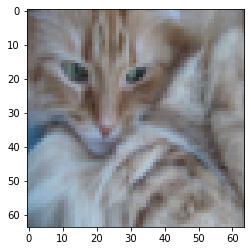

In [3]:
# plot images

index = 2
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + 
       ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [4]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y_orig.shape))
print ("test_x shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x shape: (209, 64, 64, 3)
train_y shape: (209,)
test_x shape: (50, 64, 64, 3)
test_y shape: (1, 50)


As usual, you reshape and standardize the images before feeding them to the network. The code is given in the cell below.

<img src="imvector.png" style="width:450px;height:300px;">

<caption><center> <u>Figure 1</u>: Image to vector conversion. <br> </center></caption>

In [5]:
# Reshape the training and test examples 
train_x = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x = test_x_orig.reshape(test_x_orig.shape[0], -1).T

In [6]:
print("X train shape ",train_x.shape)
print("y train shape ",train_y.shape)
print("X test shape ",test_x.shape)
print("y test shape ",test_y.shape)

X train shape  (12288, 209)
y train shape  (1, 209)
X test shape  (12288, 50)
y test shape  (1, 50)


# Now bulid your model (you will start code from here )

# first step create model

- keras.models import Sequential
- create your model object

In [7]:
# building model
from keras.models import Sequential
model = Sequential()




# second step Add layers

- function add()
- function Dense (units = , activation =  , name =)

In [8]:
from keras.layers import Dense
model.add(Dense(units=15,activation="relu",name="HL1"))
model.add(Dense(units=15,activation="relu",name="HL2"))

model.add(Dense(units=1,activation="sigmoid",name="OL"))


# third step complie model

- function compile(optimizer =  , loss = 	'binary_crossentropy', metrics = )

In [9]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"] )

# fourth step fit & predict

- function fit(x,y, batch_size = 64  ,epochs = )
- function predict (x)

In [10]:
print(train_x.T.shape)
print(train_y.T.shape)

(209, 12288)
(209, 1)


# try Regularization & adam optimizer to see their effect

In [11]:
opt = keras.optimizers.Adam(learning_rate=0.01)

In [12]:
keras.regularizers.l2(l2=0.01)

In [13]:
model.fit(train_x.T,train_y.T,batch_size=64,epochs=100 )


Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 86.9919 - accuracy: 0.5488
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 98.2638 - accuracy: 0.4223
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 99.7875 - accuracy: 0.6648
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 60.6774 - accuracy: 0.6450
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 38.4698 - accuracy: 0.4124
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 25.9485 - accuracy: 0.6351
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 22.2599 - accuracy: 0.5446
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 28.6008 - accuracy: 0.6700
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 16.5230 - accuracy: 0.6076
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 16.0558 - accuracy: 0.6818
Epoch 11/100
4/4 [=

# now test your predictions

- Note
    in Line 5 put your predicted y_test in str(......)
    
    for example
        print ("y = " + str(y_test_predict[0, index] )+ 
    choose your index as you like

In [14]:
pred_y = model.predict(test_x.T)
pred_y = pred_y > 0.5

y = [False]. It's a cat picture.
y = [False]. It's a cat picture.
y = [False]. It's a cat picture.
y = [False]. It's a cat picture.
y = [False]. It's a cat picture.
y = [False]. It's a non-cat picture.
y = [False]. It's a cat picture.
y = [False]. It's a cat picture.
y = [False]. It's a cat picture.
y = [False]. It's a cat picture.
y = [False]. It's a cat picture.
y = [False]. It's a cat picture.
y = [False]. It's a cat picture.
y = [False]. It's a non-cat picture.
y = [False]. It's a non-cat picture.
y = [False]. It's a cat picture.
y = [False]. It's a non-cat picture.
y = [False]. It's a cat picture.
y = [False]. It's a cat picture.
y = [False]. It's a cat picture.
y = [False]. It's a cat picture.
y = [False]. It's a non-cat picture.
y = [False]. It's a non-cat picture.
y = [False]. It's a cat picture.
y = [False]. It's a cat picture.
y = [False]. It's a cat picture.
y = [False]. It's a cat picture.
y = [False]. It's a non-cat picture.
y = [False]. It's a cat picture.
y = [ True]. It

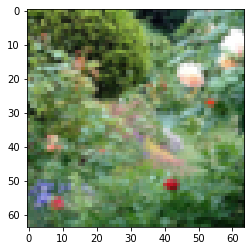

In [15]:
# plot images
for i in range(50):
       index = i
       plt.imshow(test_x_orig[index])
       print ("y = " + str(pred_y[index]) + 
              ". It's a " + classes[test_y[0,index]].decode("utf-8") +  " picture.")

# see your model summary
- function summary()

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HL1 (Dense)                  (None, 10)                122890    
_________________________________________________________________
HL2 (Dense)                  (None, 10)                110       
_________________________________________________________________
HL3 (Dense)                  (None, 10)                110       
_________________________________________________________________
OL (Dense)                   (None, 1)                 11        
Total params: 123,121
Trainable params: 123,121
Non-trainable params: 0
_________________________________________________________________


In [17]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_y.T,pred_y))

[[15  2]
 [33  0]]
